 <center>

<img src=https://www.cct.ie/wp-content/uploads/CCT_Logo_New_Aug_17-2.jpg width=600>

</center> 

<center>

**CA1**- Statistical techniques for Data Analysis

**" Telco: Customer Churn"**

**Lecture:** Aldana Louzan\
**Students:** 
Daniela Daia - 2017207\
Jose Reyes   - 2022240







# First Section


### Introduction

Statistics is a science whose application extends to many areas of human knowledge. It is a set of techniques that allows, in a systematic way, to organise, describe, analyse and interpret raw data from studies or experiments carried out in any area of ​​knowledge. Statistics is divided into three areas: descriptive, probabilistic and inferential (Rowntree, 2018). For this challenge, it will be analysed Descriptive Statistics.

According to Slavio (2019), descriptive statistics is the initial stage of data analysis. It aims to describe the observed data by obtaining, organising, reducing and representing statistical data to explain the observed phenomenon. Therefore it help to show the data in a more meaningful way, which allows a more straightforward interpretation of the data by using measures of central tendency ( mean, median, and frequency or mode) and measures of spread ( standard deviation, variance, minimum and maximum variables, kurtosis and skewness).

The “Telco-Customer-Churn” dataset was chosen for this CA because the authors have a background in Marketing, so by analysing its outputs,it would be possible to make actionable insights to retain customers and increase customers’ lifetime values or if The final goal will be evaluate different models to predict if a customer will “Churn” or not.

This dataset contains qualitative or categorial and quantitative or numerical data. Each row represents a customer, and each column includes the customer’s attributes described in the column. The “Churn” column is the predictor or the target data.





### Business understanding
Daniela to parafrase and reference: Predicting customer churn is critical for telecommunication companies to be able to effectively retain customers. It is more costly to acquire new customers than to retain existing ones. In other words, it is most commonly expressed as the percentage (or number) of service subscribers who discontinue their subscriptions within a given time period.For this reason, large telecommunications corporations are seeking to develop models to predict which customers are more likely to change and take actions accordingly.
In this challenge, it will be builded a model to predict how likely a customer will churn by analyzing its characteristics: (1) demographic information, (2) account information, and (3) services information.

The objective is to obtain a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue.


This study aims to find the most commom behaviors that makes a customer leave according to the data set available in [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).





### Data Understanding


Reading and observing the data: this step consists of collecting, describing, exploring, organizing and documenting all the available data to conduct the exploratory analysis. Also, it verifies the quality of the data and identifies missing values and outliers.
Through this analysis, it will be possible to avoid unexpected problems in the project’s next phase: data preparation, which is the biggest part of a data analysis project and demands a clear comprehension of the dataset.



#### Data Dictionary

A data dictionary is used to catalogue and communicate the structure and content of data and provides meaningful descriptions for individually named data objects (Wertz, 1993).

21 Variables 7043 Observations.

Demographic Information:

- **Gender:** The gender of the customer.
-**SeniorCitzen:** Whether a customer can be classified as a senior citzen.
- **Partner:** If a customer is married/in a live-in relationship.
- **Dependents:** If a customer has dependes (children/retired parents).

Customer Account Information:

- **Tenure:** The time for which a customer has been using the service.
- **Contract:** The type of contract a customer has chosen.
- **PaperlessBilling:**  Wheter a customer has an option for paperless billing.
- **MontlyCharges:** Specifies the money paid by a customer each month.
- **TotalCharges:** The total money paid by the customer to the company.
- **PaymentMethod:** Specifies the method by which bills are paid.

Service Information:

- **PhoneService:** Wheter a customer has a landline phone service along with the internet service.
- **MultipleLines:** Wheter a customer has multiple lines of internet connectivity.
- **InternetService:** The type of internet chosen by the customer.
- **OnlineSecurity:** Specifies if a customer has online security.
- **OnlineBackup:** Specifies if a customer has online backup.
-**DeviceProtection:** Specifies if a customer has opted for device protection.
- **TechSupport:** Wheter a customer has opted for tech support or not.
- **StreamingTV:** Wheter a customer has an option of TV streaming.
-  **StreamingMovies:**  Wheter a customer has an option of Movie streaming.

Target variable:

- **Churn:** This is the target variable wich specifies if a customer has churned or not.




####Data Caractherization

Characterization essentially generates condensed representations of whatever information content is hidden within data.

In order to work with the dataset the following libraries it will be imported:

**matplotlib**: creates charts\
**pandas**: loads tabulated data\
**scikit-learn**: performs machine learning\
**scipy**: contains statistics\
**seaborn**: visualization library\
**numpy**: to perform mathematical operations\
**Statistics**: provides functions for calculating mathematical statistics of numeric data.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

We use pandas to read our data that is csv file located on Google Drive:

In [2]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


According with the function shape below, we can see that the data contains 7043 columns and 21 rowns.

In [4]:
df.shape

(7043, 21)

To obtain more information about this dataset the info() method can also be used. It contains different data types: object,int64 and float, in other words, numerical and categorical data. The column Total Charges shows as onject but this one shoud be internure since it contains numbers. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Also, Some data that should be categorical are saved as number, such as SeniorCitzen.

In [6]:
df['SeniorCitizen'] = df.SeniorCitizen.astype('object')

Finding the number of unique values in each feature. This is important because the high number of unique values denote it is a continous data and less unique values denote the feature is a categorical feature.

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

From the data type analyses above, the variable "TotalCharges" is typed as an object and should be a numerical value.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



Most of the features are categoricals and they have YES , NO classes, in most of the cases. 
Feature Gender is well balanced showing 3,555 Male and 3,488 Female. Most of the costumer are not Senior Citizen, it is interesting that more than 50% of customer have Month to Month contract and many customer are new customer having only one month tenure.

The method below shows all the features in data set one by one and its data type. by adding value_count, we can also see value count in each class within the features.


In [10]:
cat_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
number_list = ['tenure','MonthlyCharges', 'TotalCharges']

for col in cat_list: #Checking Data
    print(col)
    print(df[col].value_counts())
    print("-------------------------------------------------")
for col in number_list: #Checking Data
    print(col)
    print(df[col].value_counts())
    print("-------------------------------------------------")

gender
Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet serv

Now, it will be show the unique values in each categorical and numerical variables.

In [11]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')
print(f'Numerical Columns: {num_cols.columns.tolist()}')
print(f'Categorical Columns: {cat_cols.columns.tolist()}\n')
print('\n\nUnique Values In Categorical columns:')
[f'{col}:   {cat_cols[col].unique()}' for col in cat_cols]

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



Unique Values In Categorical columns:


["customerID:   ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'\n '3186-AJIEK']",
 "gender:   ['Female' 'Male']",
 'SeniorCitizen:   [0 1]',
 "Partner:   ['Yes' 'No']",
 "Dependents:   ['No' 'Yes']",
 "PhoneService:   ['No' 'Yes']",
 "MultipleLines:   ['No phone service' 'No' 'Yes']",
 "InternetService:   ['DSL' 'Fiber optic' 'No']",
 "OnlineSecurity:   ['No' 'Yes' 'No internet service']",
 "OnlineBackup:   ['Yes' 'No' 'No internet service']",
 "DeviceProtection:   ['No' 'Yes' 'No internet service']",
 "TechSupport:   ['No' 'Yes' 'No internet service']",
 "StreamingTV:   ['No' 'Yes' 'No internet service']",
 "StreamingMovies:   ['No' 'Yes' 'No internet service']",
 "Contract:   ['Month-to-month' 'One year' 'Two year']",
 "PaperlessBilling:   ['Yes' 'No']",
 "PaymentMethod:   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'\n 'Credit card (automatic)']",
 "Churn:   ['No' 'Yes']"]

In [12]:
df = df.drop(['customerID'], axis=1)

#### Descriptive Stats

This dataset contains qualitative and quantitative data. No missing values have been found so far. The column "Churn" is the dependable variable. This variable only has two categorical values:  "yes" and "no".

The next step consisted of obtaining the summary statistics for the numerical values in the data frame using the ".describe" function, which is responsible for generating **descriptive statistics** that summarise the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values (McKinney, 2017).



The profile_report function shows a statistics sum including:
Percentage of missing value in each feature;
Distinct values in each categorized feature and frequency in each distinct value.
Histogram in each categorized and continuous feature
Statistical describe, such as maximum, minimum, mean, etc, in each continuous feature.
Correlations Matrix between each two features in the dataset.


In [13]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The measures of dispersion evaluate how distributed the collected data are. They are standard deviation, variation and interquartile range (The pandas development team, 2020).
Using describe(), important statistical information is displayed, mean,median, min, max, etc. The method only works with numerical data, therefore only three features are shown. Further, it will need to encode the categorical variables to extract deeper information about the data set in order to apply hypoteses tests. Their mean and median are different and range in ternure and Monthly Charges are big. They dont have a normal distribution. 


In [14]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


The plots above show the distribution of each numerical variable in the dataset:

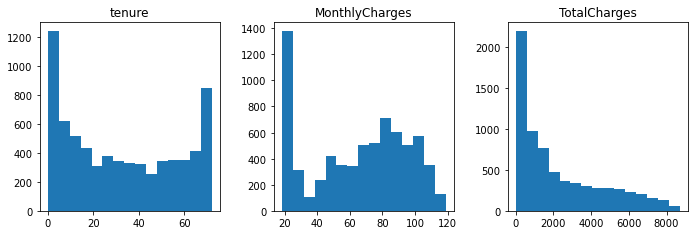

In [15]:
df.hist(bins = 15 , layout = (4,5), figsize = (20,17)  ,column = df.columns, grid = False)
plt.show()

Tenure variable is stacked at the tails, that means that a large proportin of customers have either been had the shortest (1 month) or longest (72 month) tenure.
It appears as if the MonthlyCharges variable is roughly normaly distribued around $80 per month with a large stack near the lowest rates. 
The TotalCharges variable is positively skewed with a large stack near the lower amounts.


Tenure, Monthly Charges and Total Charges don't have any Outliers so it does not neet to extract information from them. B
riefly, outliers are extreme values that are significantly from the overall pattern of values in a dataset (Ramalho, 2015). 


<AxesSubplot:>

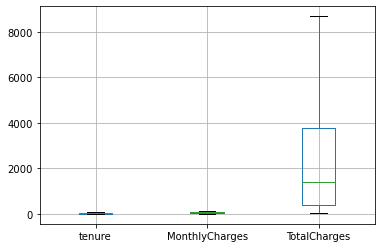

In [16]:
df.boxplot()

Adding (include="all")in the code below, all features, including the categorical are displayed:

In [17]:
df.describe(include=object)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174



It will be analysed all the categorical variables, starting from the demographic ones:








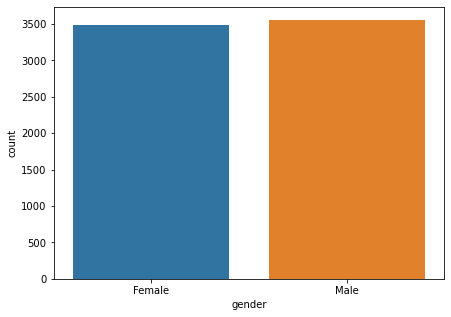

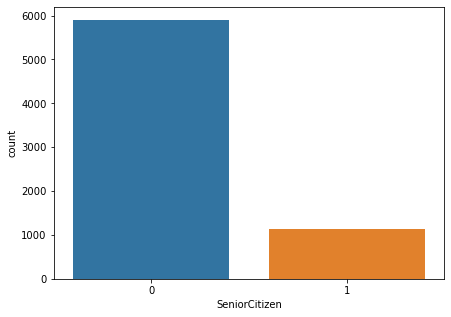

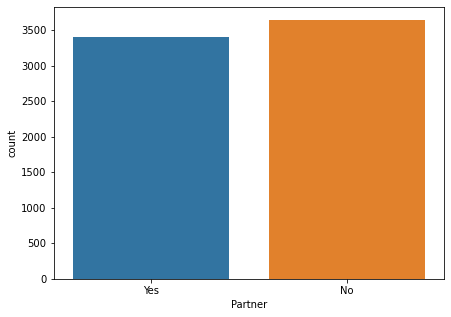

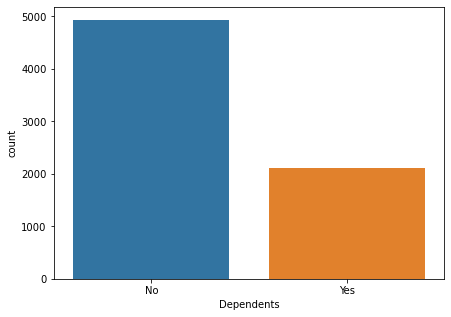

In [18]:
Columns= ['gender','SeniorCitizen', 'Partner','Dependents']
for col in Columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x=col,data=df)
    plt.show()

From these demographic plots, it is noticed that the sample is evenly split across gender and partner status. A minority of the sample are senior citizens, and a minority have dependents.
There are almost equal number of male and female customers.
Only 16.21% of customers are senior citizens.
There are fairly equal number of customers who have a partner.
Only 29.96% of customers have dependents

The offered services are plotted below:

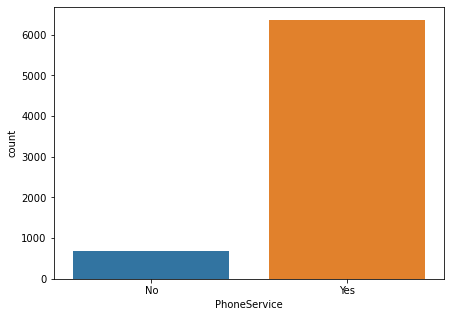

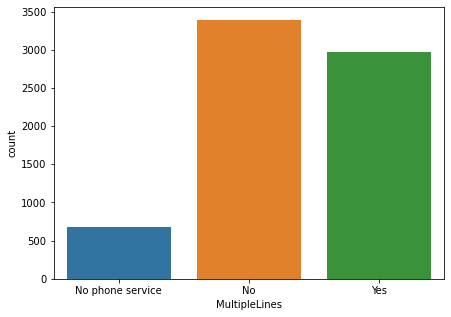

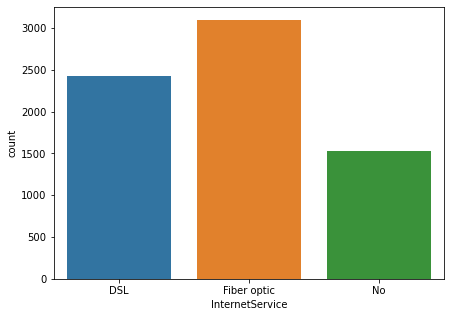

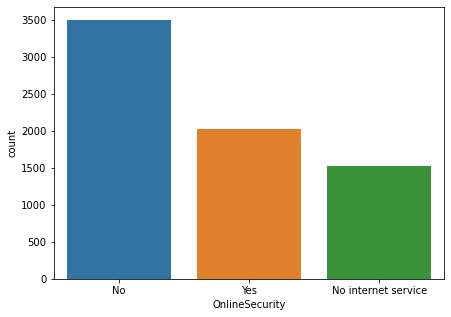

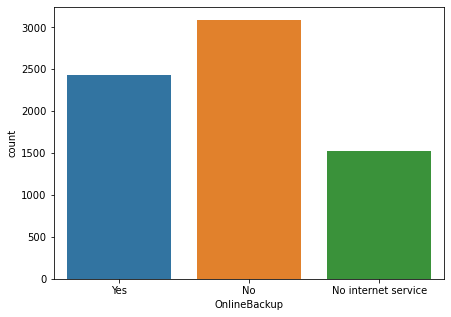

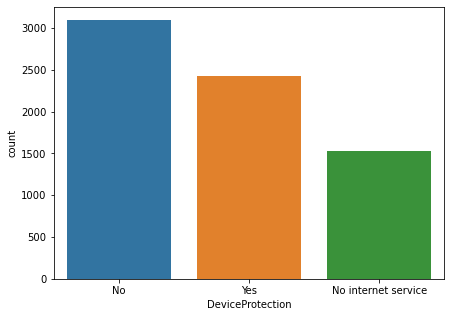

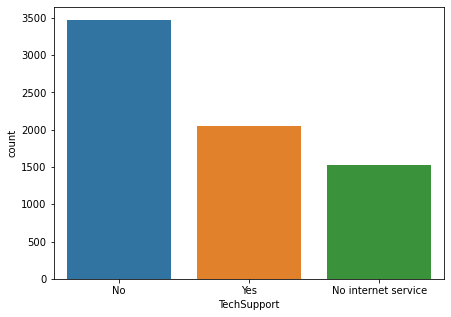

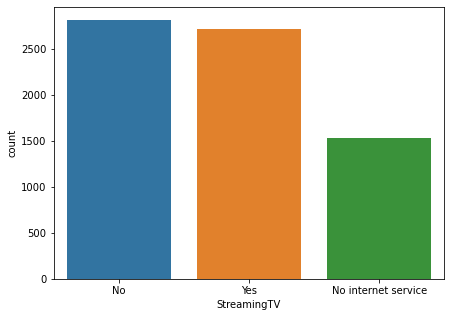

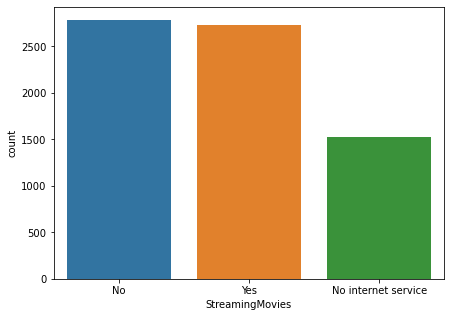

In [19]:
Columns= ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for col in Columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x=col,data=df)
    plt.show()

The other categorical variables are related to contract and payment status:

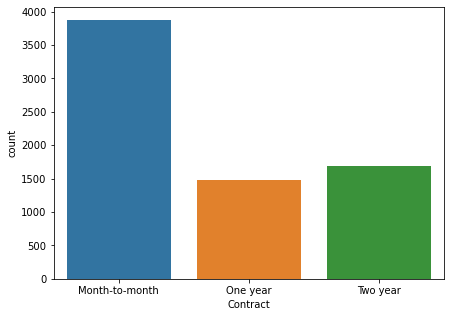

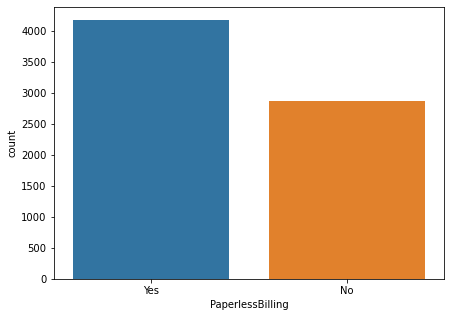

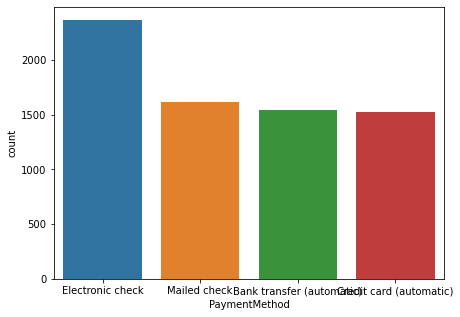

In [20]:
Columns= ['Contract','PaperlessBilling','PaymentMethod']
for col in Columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x=col,data=df)
    plt.show()

It could be said that half of the sample are on month-to-month contracts with the remaining split between one and two year contracts. Most of the sample are on paperless billing, and pay by electronic check.



Target label Churn as shown below, "Yes" are customer that left and "No" are customer who stayed. Almost 2000 costumer left which represent more than 25%. Those are bad digits for a company. 
Roughly a quarter of the sample are no longer customers. 



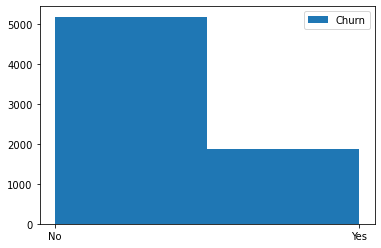

In [21]:
df["Churn"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "Churn", bins = 2);

According to the graphs below , variables creating more churn are:  Contract, Device protection, Tech Support, Online Backup, so this tells us that the company needs to work on online customer service the online back up and payment methods.  
Furthermore,customer who use Fiber optic leaves against who use DSL that mean we most depend on DSL for Internet Service.
Also, can be notesd that if Customer don't have partner he can leave company easy.



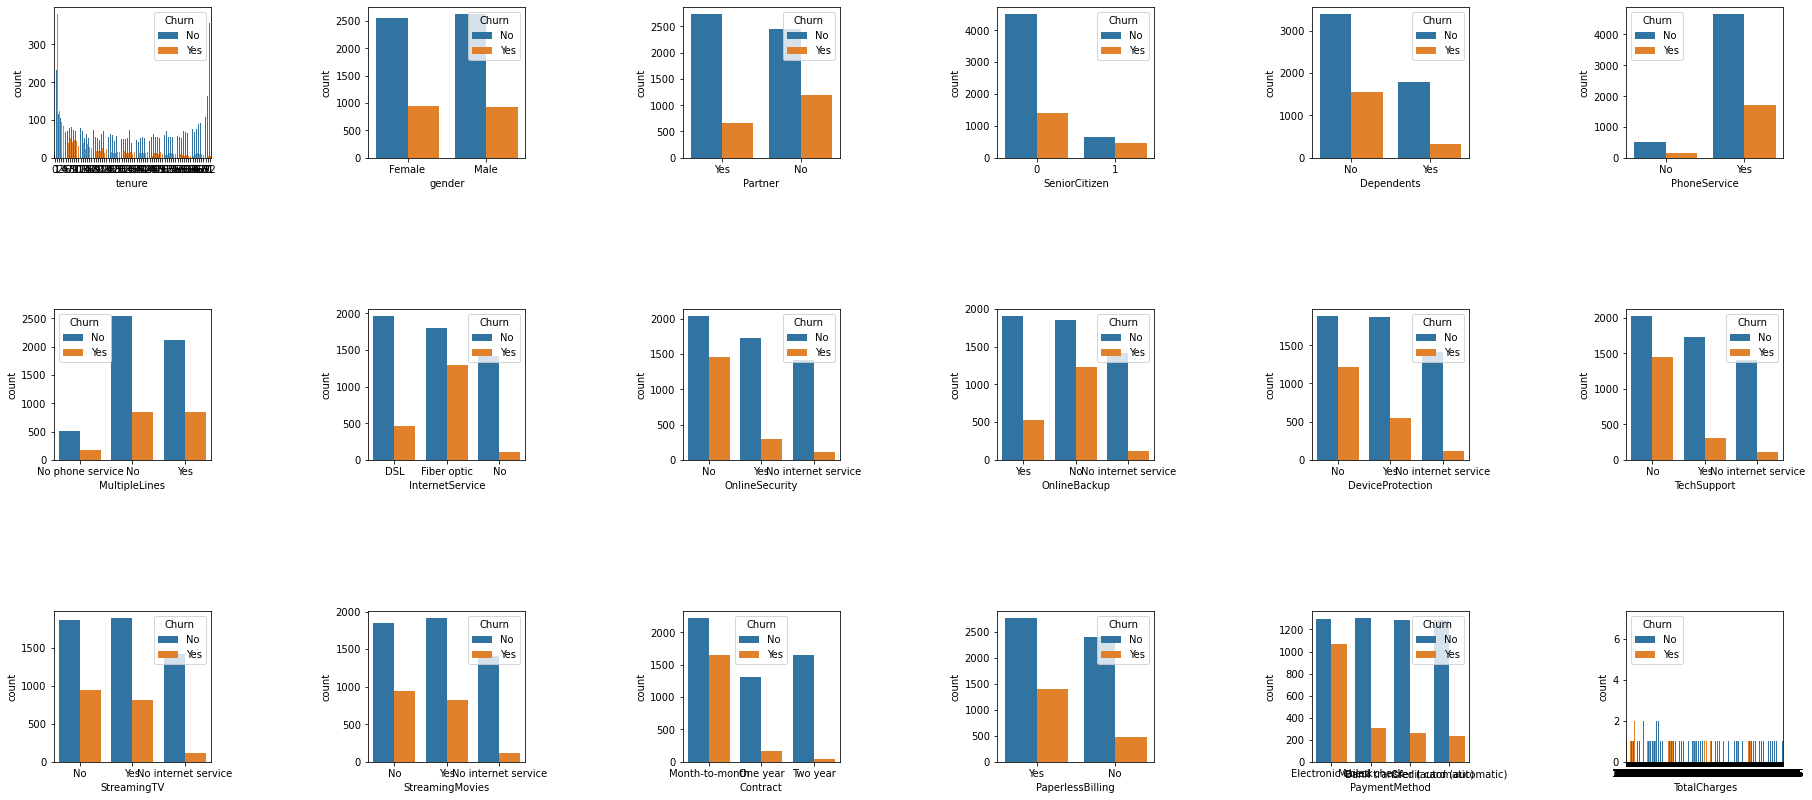

In [60]:

columns = ['tenure','gender', 'Partner','SeniorCitizen','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 
           'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','TotalCharges']
plt.figure(figsize=(31,25))

for col in range(len(columns)):
    plt.subplot(5,6,col+1)
    sns.countplot(x=df[columns[col]],hue=df['Churn'])    
    plt.subplots_adjust(wspace = 1, hspace= 1)


### Data Preparation

Data preparation is an essential step that consists of cleaning, constructing, integrating and formatting the raw data prior to processing and analysis. the first step is check the presence of issing values in the data set.

It will be dropped a "customerID" column that there is no relevance to this analyses at this stage and can couse noise.


#### Missing Values

The easiest way to check for missing values is provided by the pandas library, they are insull() and notnull() these are functions that always return a binary value, in this case false or true indicating whether the value of the argument passed contains missing values (The Pandas Development Team).

The Pandas function df.isnull() will be used to detect missing values. It returns a Boolean object of the same size, indicating whether the values are NaN. NaN values such as None, numpy.NaN, or pd.NaT map to True values, indicating that these missing values are numeric containers. Everything else is mapped to false values (Ramalho, 2015).

In [22]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:>

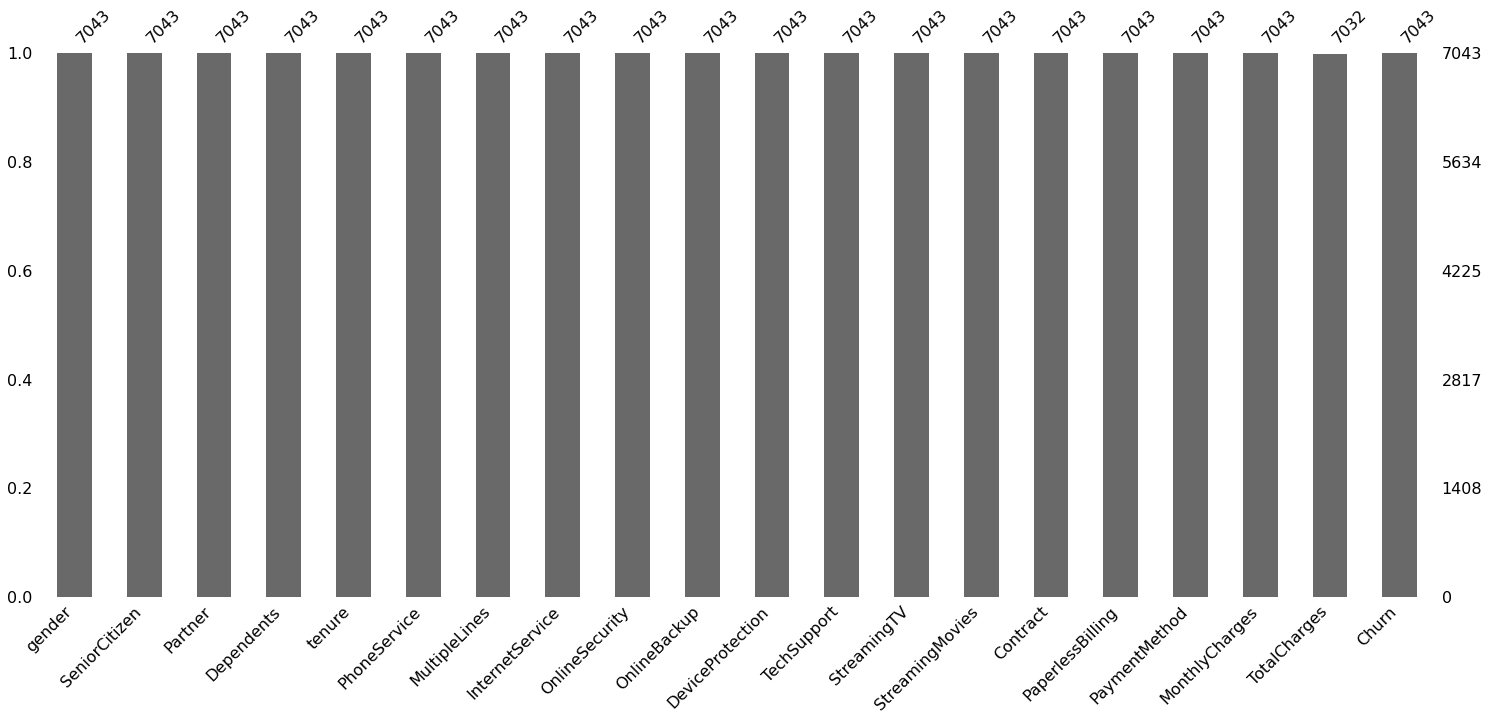

In [23]:
msno.bar(df)

As the number of missing values is low, it was decided to fill with the median.

In [24]:
df.fillna(df.median())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


As noted, there is no presence of missing value in this dataset.
The code below finds possible duplicated values:

In [25]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data engineering

In order to analyse the data set and apply future hypotheses tests, correlation analysis or machine learning models it is needed to enconde the data set, in other words, to transform categorical variables to numerical variables.
The code below will encode the ategorical variable to numerical variable:

In [27]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.apply(LabelEncoder().fit_transform)

In [28]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


Now, the data det is ready to be processed.

## Statistical measures

Picking two different types of variables to decribe them using statistical measures. "Contract" and "Tenure"

**Qualitative Variable** variable "Contract", It shows the types of contracts the company offers, the company has 3 types of contracts and the one costumers prefer is Month to Month, possibly due to its flexibility , however customer getting this contract are also the ones morelikely to stop using the companie´s service. 

In [29]:
df_encoded["Contract"].value_counts()

0    3875
2    1695
1    1473
Name: Contract, dtype: int64

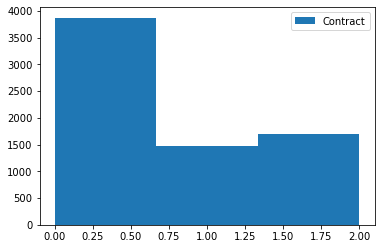

In [30]:
df_encoded["Contract"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "Contract", bins = 3);

In [31]:
from scipy import stats
mode_Contract = df_encoded["Contract"].mode()
print(mode_Contract)

0    0
Name: Contract, dtype: int64


As expected Variable "Contract" has a unique mode :Month to month is the Mode in this variable.  

In [32]:
print(df_encoded["Contract"].isnull().sum())

0


**This variable has no missing values.** We can confirm that beacuse the result on the previous funtion was 0. This method isnull.sum gives the sum of all missing values in a variable. This is a Categorical variable so , there is no calculation for outliers. 

**Quantitative Variable**: Second Variable is called "Tenure" , it show how many month  a costumer has been using the companie´s services. The correlation between this feature and the target variable is significant , therefore this feature was selected to be analysed. Using Central Tendency measures.

Churn          0         1
tenure                    
0       1.000000  0.000000
1       0.380098  0.619902
2       0.483193  0.516807
3       0.530000  0.470000
4       0.528409  0.471591
...          ...       ...
68      0.910000  0.090000
69      0.915789  0.084211
70      0.907563  0.092437
71      0.964706  0.035294
72      0.983425  0.016575

[73 rows x 2 columns]


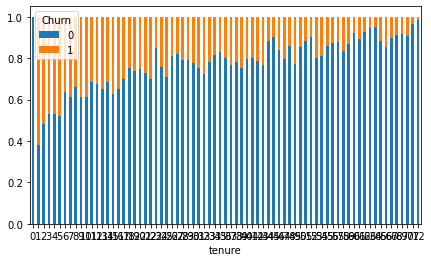

In [33]:
CrosstabResult = pd.crosstab(index = df_encoded["tenure"], columns = df_encoded['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

In [34]:
print(df_encoded["tenure"].isnull().sum())

0


There are no missing values in this Variable. we can see the result for missing values is 0

In [35]:
mean = df_encoded["tenure"].mean()
print(mean)

32.37114865824223


In [36]:
median = df_encoded["tenure"].median()
print(median)

29.0


In [37]:
mode = df_encoded["tenure"].mode()
print(mode)

0    1
Name: tenure, dtype: int64


Mean, median and Mode have different values which means that this features does not have a normal distribution. The unique mode has the value 1, this means most costumer in this company only have 1 month using the companie´s services. Also must customer leaving the company have 1 month using the service.

In [38]:
min= df_encoded["tenure"].min()
max= df_encoded["tenure"].max()
print(min)
print(max)

0
72


In [39]:
variance_tenure = df_encoded["tenure"].var()
print(variance_tenure)

603.1681081237256


In [40]:
std_tenure = df_encoded["tenure"].std()
print(std_tenure)

24.55948102309423


The Range in this Variable is 71, having a standar deviation of 24.5 and Variance of 603 which is very high. This means that the data in this variable is spread. customer wiht 0 monts but also customer with 72 months using the company services. 

<AxesSubplot:xlabel='tenure'>

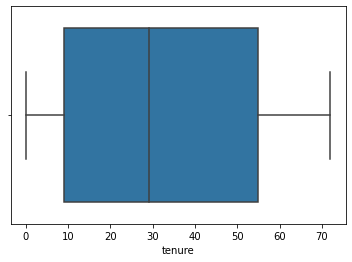

In [41]:
sns.boxplot(x=df_encoded["tenure"])

In [42]:
first_quantile = df_encoded["tenure"].quantile(0.25)
third_quantile = df_encoded["tenure"].quantile(0.75)
print(first_quantile)
print(third_quantile)

9.0
55.0


Most of the data are between first quartile = 9 and third quartile = 55. Some outliers from 0 to 8 and from 56 to 72. 

The distribution of Variable Tenure has a light positive Skewness, this is something we were able to deternmine even before since the Mean of this variable is higher than the Median. 

In [43]:
skewness = df_encoded["tenure"].skew()
print(skewness)

0.2395397495619829


According to "tenure" kurtosis , it  indicates that the distribution has lighter tails 

In [44]:
kurtosis= df_encoded["tenure"].kurtosis()
print(kurtosis)

-1.387371635971685


<AxesSubplot:>

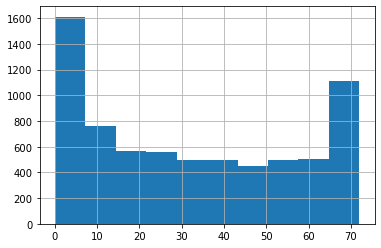

In [45]:
df.tenure.hist()

<AxesSubplot:xlabel='tenure', ylabel='Density'>

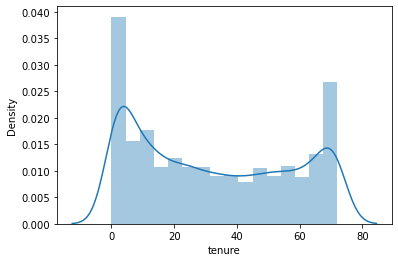

In [46]:
sns.distplot(df_encoded["tenure"], kde = True)

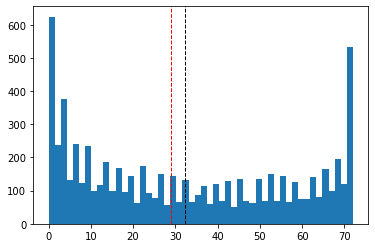

In [47]:
mean = df_encoded["tenure"].mean()
median = df_encoded["tenure"].median()
plt.hist(df_encoded["tenure"], bins = 50)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)

The distribution of this variable is so abnormal that almost looks like if we are dealing with two separate datasets. This is due to many values on the Minimun being the same and many values in the Maximun being the same too. Many costumer with only 0 or few months but many costumer with almost 70-72 months as well. whereas for the rest amount of months the amount of costumers is similar. however its mean is higher than the median so data have positive skewness.
There are no missing values in this Variable. we can see the result for missing values is zero.


Most months that customer stay with company between 3:8 months

# Second Section

### Data Exploration

To better understand the patterns in the data and potentially form some hypothesis, it will be analysed the distribution of individual variables and then slice and dice the data for any interesting trends.

### Hypothesis Testing


Hypothesis testing is an important inference tool in the aplication of statistics to real life problems. It is used to make decisions concerning population based on its sample. Inferencial statistics allows to directly test the hypoteses by evaluating a research question based on a sample with a goal of generalise the results to the large population wich the sample of taken by assessing evidence provided by the data in favor of or against each hypotesis made about the population.

As already seen previosly, the top factors afecting Churn status are:

*   tenure
*   Contract type
*   Online Security Service
*   Tech Support
*   Internet Service
*   Payment Method

Based on that, it is chosen to analyse the 'TechSupport' and its relationship with churn.
From the visualization above, customers in the first category of TechSupport has more percentage decided to churn rather than customer in the second and third category. 



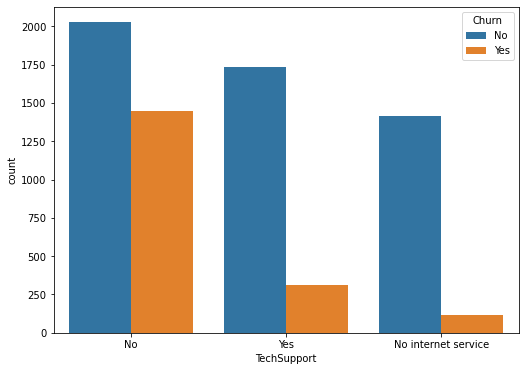

In [48]:
columns = ['TechSupport']
plt.figure(figsize=(25,18))

for col in range(len(columns)):
    plt.subplot(2,2,col+1)
    sns.countplot(x=df[columns[col]],hue=df['Churn'])    
    plt.subplots_adjust(wspace = 1, hspace= 1)

###  Chi-Square Test of Independence - Categorical Features

The purpose of this analysis is want to know relation between the features and the target variable Churn=YES.

The test will determine if there is significant difference in the proportion of Churns between the groups in the categorical variable.

The first value is the Chi-square value, followed by the p-value , then comes the degrees of freedom, and lastly it outputs the expected frequencies as an array. 

If all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05.

Chi-squared tests are based on the so-called chi-squared statistic. And it can be calculated with the following statistic formula:

sum((observed−expected)2expected)
 

In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. Let's calculate the chi-squared statistic for our data to illustrate:

- Hypothesis:

Null hypothesis (H0) : Categorical variables and the feature Churn=YES decision are independent
Alternatif hypothsis (H1) : Categorical variables and Churn decision are dependent

- With significance value alpha = 0.05

Samples are already in the data which contains 7043 samples.

- Calculate the P-value

If the p-value is lesser than alpha then we will reject the null hypothesis and accept the alternative that the proportions of Churn is dependent with the group in the categorical variable





In [49]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

In [50]:
features = pd.Series(cat_cols.drop(['Churn','customerID'], axis=1).columns).append(pd.Series(['SeniorCitizen']))

In [51]:
features

0               gender
1        SeniorCitizen
2              Partner
3           Dependents
4         PhoneService
5        MultipleLines
6      InternetService
7       OnlineSecurity
8         OnlineBackup
9     DeviceProtection
10         TechSupport
11         StreamingTV
12     StreamingMovies
13            Contract
14    PaperlessBilling
15       PaymentMethod
0        SeniorCitizen
dtype: object

In [52]:
# this function creates will automaticall generate the decision for the chi square test
def chi_square_test(data, feature):
    df = pd.crosstab(data[feature],data['Churn'])
    stat, p, dof, expected = chi2_contingency(df)
    print('='*60)
    print('Chi-Square Test for {}'.format(feature))
    print('='*60)
    print('degrees of freedom = %d' % dof)
    print('-'*60)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Results:')
    print(' ')
    print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
    print('-'*60)
    print('Decision based on Chi-Square Statistics:')
    print(' ')
    if abs(stat) >= critical:
        print('The Churns are dependent on {} : (reject H0)'.format(feature))
    else:
        print('The Churns are independent on {} : (fail to reject H0)'.format(feature))
    # interpret p-value
    alpha = 1.0 - prob
    print('-'*60)
    print('Decision based on p-value:')
    print(' ')
    print('alpha = %.2f, p = %.3f' % (alpha, p))
    if p <= alpha:
        print('The Churns are dependent on {} : (reject H0)'.format(feature))
    else:
        print('The Churns are independent on {} : (fail to reject H0)'.format(feature))
    print('_'*60)
    print(' '*60)
    print('_'*60)
    print('_'*60)

In [53]:
for feature in features:
    chi_square_test( df_encoded, feature);

Chi-Square Test for gender
degrees of freedom = 1
------------------------------------------------------------
Results:
 
probability = 0.950, critical = 3.841, stat = 0.484
------------------------------------------------------------
Decision based on Chi-Square Statistics:
 
The Churns are independent on gender : (fail to reject H0)
------------------------------------------------------------
Decision based on p-value:
 
alpha = 0.05, p = 0.487
The Churns are independent on gender : (fail to reject H0)
____________________________________________________________
                                                            
____________________________________________________________
____________________________________________________________
Chi-Square Test for SeniorCitizen
degrees of freedom = 1
------------------------------------------------------------
Results:
 
probability = 0.950, critical = 3.841, stat = 159.426
------------------------------------------------------------
De

### ANOVA Test of Difference - Numerical Features

This test will  if there is significant difference between the means of Churn=YES and Churn=NO in numerical variables Tenure, Total Charges and Monthly Charges.

The null hypothesis assumes that there no statistically significant difference in means between the Churn groups.
The alternative assumes there is significant difference between the group.


The alpha statistics is set to 0.05%.

If the p-value is lesser than alpha then we will reject the null hypothesis and accept the alternative that there is significant difference between the groups.

In [54]:
df_encoded['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [61]:
yes = df_encoded['MonthlyCharges'][df_encoded['Churn']==1]
yes = yes.sample(round(len(yes)*0.05))
no = df_encoded['MonthlyCharges'][df_encoded['Churn']==0]
no = no.sample(round(len(no)*0.05))
stats.f_oneway(yes, no)

F_onewayResult(statistic=9.436646834673267, pvalue=0.002293528157950627)

In [63]:
yes = df_encoded[['TotalCharges'][data['Churn']==1]
yes = yes.sample(round(len(yes)*0.05))
no = data['TotalCharges'][data['Churn']==0]
no = no.sample(round(len(no)*0.05))
stats.f_oneway(yes, no)

SyntaxError: invalid syntax (3150514305.py, line 2)

In [ ]:
yes = df_encoded['tenure'][data['Churn']==1]
yes = yes.sample(round(len(yes)*0.05))
no = df_encoded['tenure'][data['Churn']==0]
no = no.sample(round(len(no)*0.05))
stats.f_oneway(yes, no)

# Third Section

### Correlation Analysis



As it is know, finding the correlation helps in identifying how each feature is correlated and also how it is correlated to the target variable.
Correlation ranges from -1 to 1.

-1 =< Corr < 0 --> Negatively correlated.
Corr = 0 --> No correlation.
0 < Corr =< 1 --> Positively correlated.

The heat map below shows the correlation between all variables in or dataset, the correlation between Tenure and Contract is positive high, we will analyse these two variables in this section. 

According to (Joshi, 2016) Heatmap is a pictorial representation of data where two groups are associated point by point. The individual values that are contained in a matrix are represented as color values in the plot.

In the heatmap below only 3 columns are displayed , this happens because they all contain numerical data. The heatmap show correlation between these features . There is a low positive correlation between Tenure and SeniorCitzen and a strong corralation between TotalCharges and Tenure aswell as TotalCharges and MontlyCharges. JOSE TO REVIEW THE THIS PART: In other words when costumer is a senior Citzen or you have more tenure the monthly charge might be a bit higher. 

<AxesSubplot:>

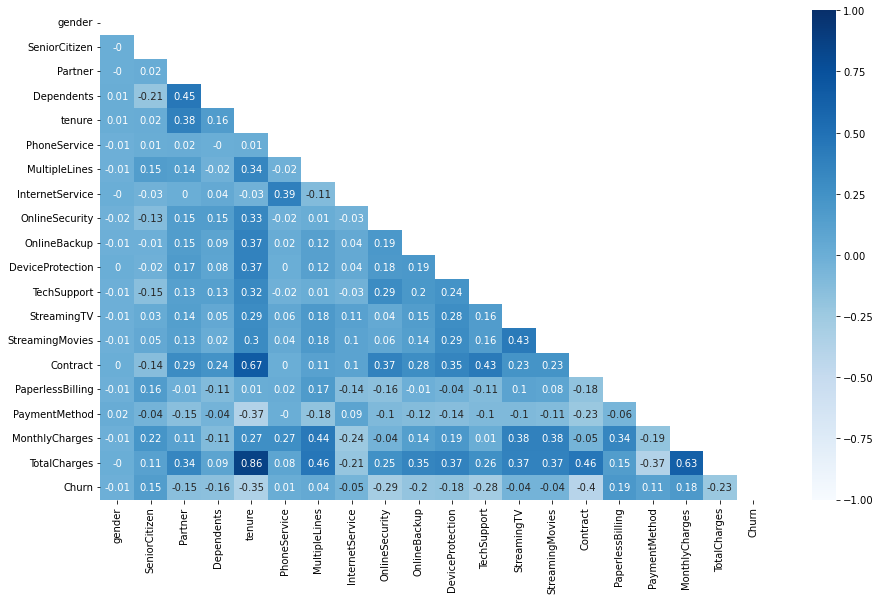

In [56]:
plt.figure(figsize = (15,9))

df_encoded.corr()

correlation = df_encoded.corr().round(2)
mask = np.triu(np.ones_like( df_encoded.corr(method = "pearson"), dtype=np.bool))

sns.heatmap(correlation,mask=mask, vmin=-1, vmax=1, annot = True, cmap = 'Blues')

<AxesSubplot:xlabel='tenure', ylabel='Contract'>

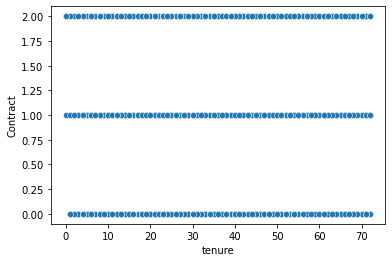

In [57]:
sns.scatterplot(data=df_encoded, x="tenure", y="Contract")

Text(0, 0.5, 'tenure')

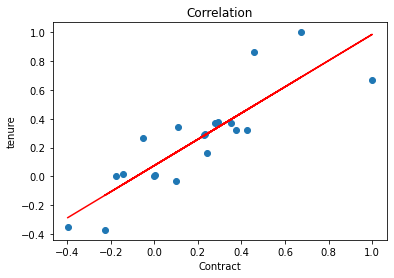

In [58]:
plt.title('Correlation')
x=df_encoded.corr()["Contract"]
y=df_encoded.corr()["tenure"]
    

plt.scatter(x,y)
 
# fits the best fitting line to the data
plt.plot(x,
         np.poly1d(np.polyfit(x, y, 1))
         (x), color='red')
 
# Labelling axes
plt.xlabel(x.name)
plt.ylabel(y.name)

In [59]:
from scipy.stats.stats import pearsonr
pearsonr(df_encoded["Contract"], df_encoded["tenure"])


PearsonRResult(statistic=0.67160654922806, pvalue=0.0)

As seen in the graph, Contract and Tenure scatter points are shown in blue on the graph. The relationship graph between these two is also seen as a linear and strong red line. They have a Moderate positive correlation of 0.67. This does not mean that one depends on the other one, there is no causation in these variables, because more tenure does not mean a longer contract and otherwise. 

This happens because as the Contract lengh is longer also the tenure of customer will be longer in most cases, for example a customer who has a 1 year Contract , will for sure have 12 month tenure when that contract finishes; whereas customer with MOnth-to Month contract can cancel at any time. 

### Linear Regression Model

# Findings and Conclusions

# Reference List under construction

Rowntree, D. (2019). Statistics Without Tears: an Introduction for Non-Mathematicians. London: Paperback.
In text: (Rowntree, 2018)
 
Slavio, J. (2019). Statistics: Practical Concept of Statistics for Data Scientists". London: Paperback.
‌
‌Spiegelhalter, D. (2019). The Art of Statistics: How to Learn from Data. New York, NY: Basic Books.

‌Suresh Kumar Mukhiya, & Ahmed, U. (2020). Hands-on exploratory data analysis with Python : perform EDA techniques to understand, summarize, and investigate your data smartly. Packt Publishing.

‌in text: (Suresh Kumar Mukhiya & Ahmed, 2020)

Tukey, J. W. (1977). Exploratory data analysis. London: Addison-Wesley Publishing Company.

**really used so far:**


Han, J., Kamber, M. and Pei, J. (2011) Data Mining Concepts and Techniques. 3rd Edition. Burlington: Morgan Kaufmann Publishers.

Joshi, P. (2016). Python machine learning cookbook : 100 recipes that teach you how to perform various machine learning tasks in the real world. Birmingham, UK: Packt Publishing.

McKinney, W (2017) Python for Data Analysis. 2nd ed. Beijing: O'Reilly Inc.

Ramalho, L. (2015) Fluent Python: clear, concise and practical programming. 1st Edition. United States of America: O'Reilly Media Inc.

Rowntree, D. (2019) Statistics Without Tears: an Introduction for Non-Mathematicians. London: Paperback.
In text: (Rowntree, 2018)
 
Slavio, J. (2019) Statistics: Practical Concept of Statistics for Data Scientists". London: Paperback.
‌Wertz, C. J. (1993) The Data Dictionary Concepts and Uses. 2nd Edition. New York: QED Information Sciences, Inc.


